# Ogólne omówienie problemu

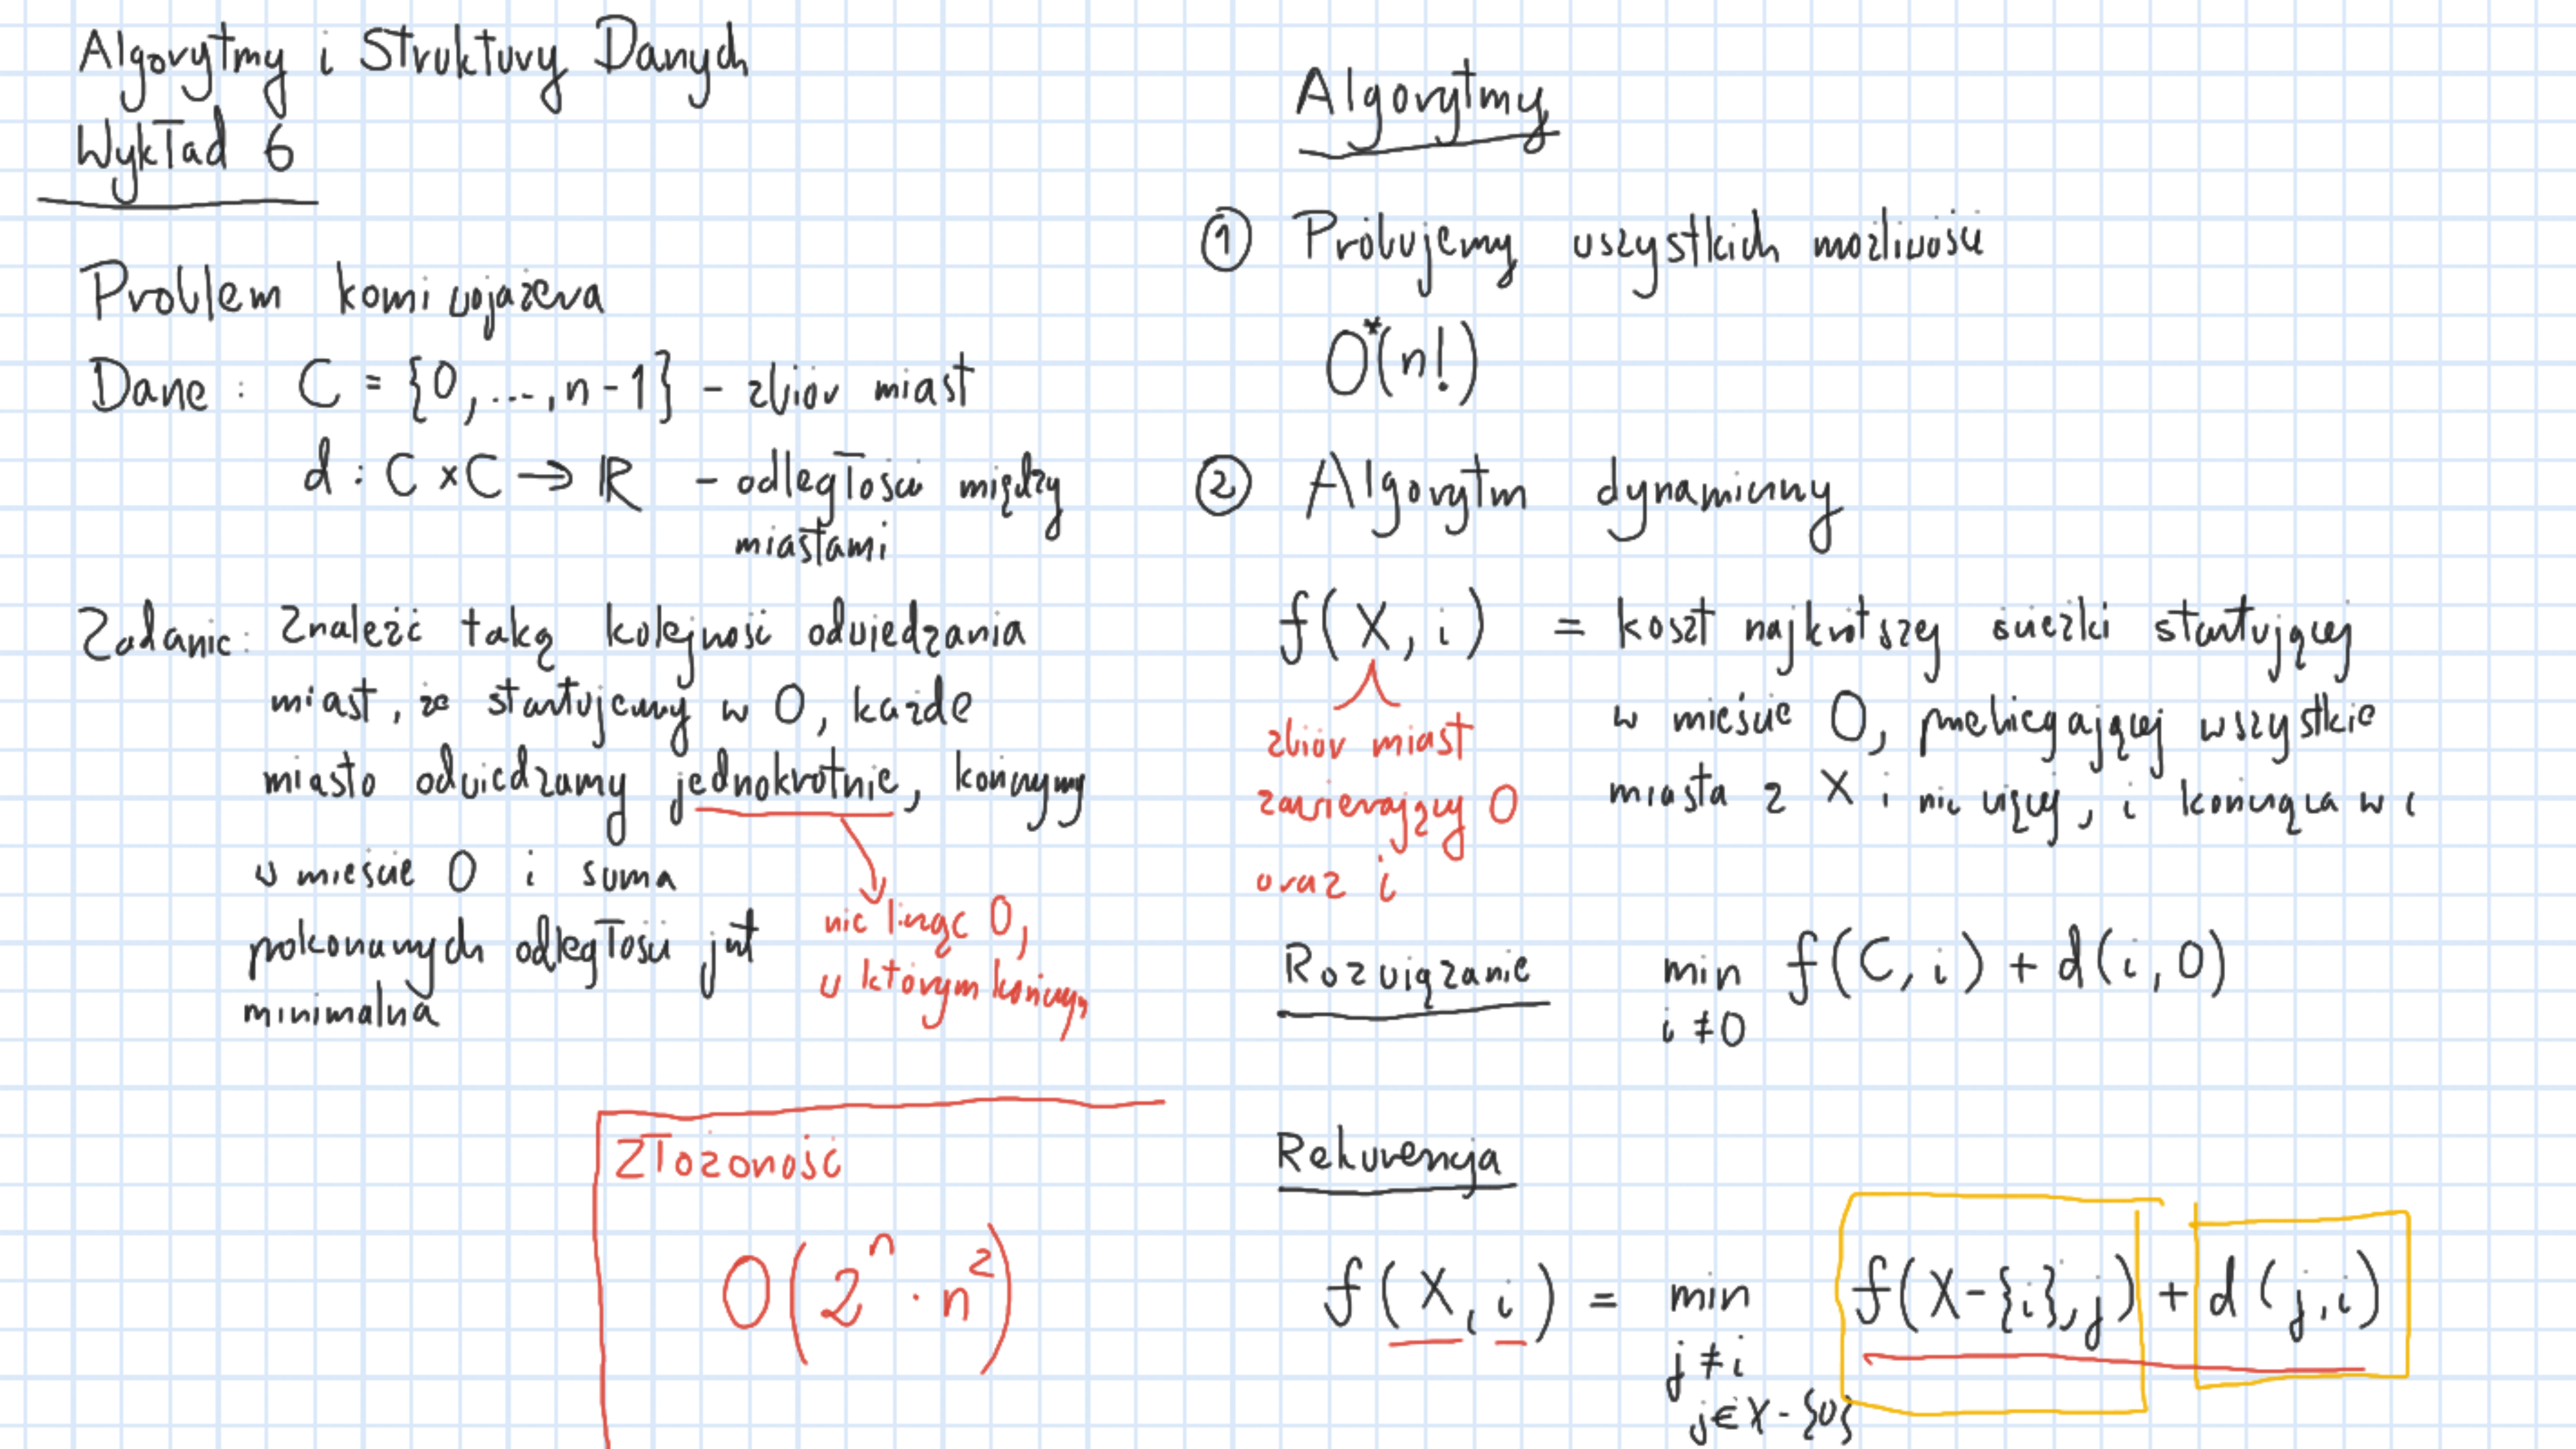

###### UWAGA:
Problem komiwojażera to tak naprawdę problem znalezienia cyklu Hamiltona w grafie (dla którego sumaryczna długość krawędzi jest najmniejsza), czyli takiego cyklu, który przechodzi przez wszystkie wierzchołki.

## Naiwne podejście
#### Złożoność czasowa: $ O(n!) $
#### Złożoność pamięciowa: $ O(n) $

### Omówienie

To podejście zakłada wygenerowanie wszystkich możliwych permutacji odwiedzanych w cyklu miast (poza punktem startowym, który jest jednocześnie punktem końcowym), a następnie sprawdzanie sumarycznej odległości, jaką należy przebyć dla danej permutacji i zapamiętywanie najmniejszej odległości.

Miasta reprezentujamy jako tablicę 2-wymiarową, zawierającą odległości między nimi. Może ona wyglądać np. tak:

    D = [
        [0, 10, 15, 20],
        [10, 0, 35, 25],
        [15, 35, 0, 30],
        [20, 25, 30, 0]
    ]

Graf, który jest reprezentowany przez powyższą macierz:
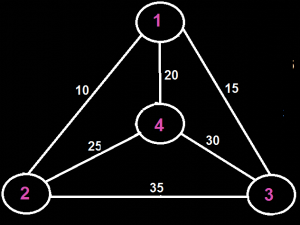

Warto zauważyć, że w takiej reprezentacji zawsze będziemy mieć macierz kwadratową, bo zarówno wiersze, jak i kolumny, odpowiadają kolejnym miastom. W wierszu o indeksie $ i $ znajdują się wartości, które oznaczają odległości z miasta o indeksie $ i $ do miasta o indeksie $ j $, gdzie $ j $ jest indeksem odpowiedniej kolumny z tego wiersza. Podobnie w drugą stronę, kolumna $ j $ zawiera odległości z miasta o indeksie $ j $ do innych miast. Jeżeli $ i = j $, przyjmujemy, że odległość wynosi $ 0 $, bo z miasta, w którym jesteśmy, nie musimy przebywać żadnej drogi, aby się w nim znaleźć. (Warto zauważyć, że może zajść sytuacja, gdy $ D[i][j] \neq D[j][i] $, bo np. z miasta trzeba wyjechać inną drogą niż do niego dotrzeć).

### Implementacja

In [1]:
def all_permutations(s):
    if len(s) <= 1: 
        yield s
    else:
        for i in range(len(s)):
            for p in all_permutations(s[:i] + s[i+1:]):
                yield [s[i]] + p
    
    
def travelling_salesman(distances: 'matrix representing distances',
                        begin_idx: 'index of beginning point' = 0):
    n = len(distances)
    # Remove the beginning point from the array of vertices to visit
    vertices = [i for i in range(n) if i != begin_idx]
    
    # Loop over all possible permutations and calculate sums of distances
    # for each of them. Store only the one of the shortest distance.
    min_dist = float('inf')
    for perm in all_permutations(vertices):
        # Store a distance from the beginning point to the first point
        # of points in the current permutation
        dist = distances[begin_idx][perm[0]]
        # Calculate distances between all the subsequent points of the
        # current permutation
        for i in range(n - 2):
            dist += distances[perm[i]][perm[i + 1]]
        # Add a distance to the end from the last point of the premutation
        dist += distances[perm[n - 2]][begin_idx]
        # Update the shortest path if found a new one which is shorter
        # than the previous one
        if dist < min_dist:
            min_dist = dist
            
    return min_dist

###### Kilka testów

In [2]:
D = [
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
]

print(travelling_salesman(D))

80


##### (Dodatkowo) Zwracanie kolejno odwiedzanych punktów (ich indeksów) w najkrótszym cyklu Hamiltona.

Wymagana jest modyfikacja algorytmu tak, aby zapamiętywał permutację punktów, która była najlepsza. Oczywiście ostatni z punktów w zwróconej tablicy indeksów jest połączony z pierwszym punktem, bo szukamy cyklu.

In [3]:
def all_permutations(s):
    if len(s) <= 1: 
        yield s
    else:
        for i in range(len(s)):
            for p in all_permutations(s[:i] + s[i+1:]):
                yield [s[i]] + p
    
    
def travelling_salesman(distances: 'matrix representing distances',
                        begin_idx: 'index of beginning point' = 0):
    n = len(distances)
    # Remove the beginning point from the array of vertices to visit
    vertices = [i for i in range(n) if i != begin_idx]
    
    # Loop over all possible permutations and calculate sums of distances
    # for each of them. Store only the one of the shortest distance.
    min_dist = float('inf')
    best_perm = []
    for perm in all_permutations(vertices):
        # Store a distance from the beginning point to the first point
        # of points in the current permutation
        dist = distances[begin_idx][perm[0]]
        # Calculate distances between all the subsequent points of the
        # current permutation
        for i in range(n - 2):
            dist += distances[perm[i]][perm[i + 1]]
        # Add a didtance to the end from the last point of the premutation
        dist += distances[perm[n - 2]][begin_idx]
        # Update the shortest path if found a new one which is shorter
        # than the previous one
        if dist < min_dist:
            min_dist = dist
            best_perm = perm
    
    return min_dist, [begin_idx] + best_perm

###### Kilka testów

In [4]:
D = [
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
]

dist, path = travelling_salesman(D)
print('Distance:', dist)
print('Path:    ', path)

Distance: 80
Path:     [0, 1, 3, 2]


# Inne naiwne podejście
#### Złożoność czasowa: $ O(n!) $
#### Złożoność pamięciowa: $ O(n) $

### Omówienie

Inne podejście, tym razem z wykorzystaniem algorytmu DFS oraz backtrackingu.

### Implementacja

In [5]:
def tsp(graph: 'matrix representing costs/distances',
        begin_idx: 'index of beginning point' = 0):
    n = len(graph)
    visited = [False] * n
    visited[0] = True
    
    def traverse(curr_idx, count, cost):
        # If all vertices have been already visited and the last
        # one is linked to the first one
        if count == n and graph[curr_idx][begin_idx]:
            return cost + graph[curr_idx][begin_idx]
        
        min_cost = float('inf')
        # Visit unvisited nodes
        for i in range(n):
            # If haven't visited 'i'th vertex yet and this vertex
            # is connected with the current vertex (there is a path
            # between the current vertex and the 'i'th one)
            if not visited[i] and graph[curr_idx][i]:
                visited[i] = True
                min_cost = min(min_cost, traverse(i, count + 1, cost + graph[curr_idx][i]))
                # Mark the current node as not visited in order to make it
                # available for the next visits
                visited[i] = False
                
        
        return min_cost
    
    return traverse(begin_idx, 1, 0)

###### Kilka testów

In [6]:
D = [
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
]

print(tsp(D))

80


## Podejście dynamiczne
#### Złożoność czasowa: $ O(2^n \cdot n^2) $
#### Złożoność pamięciowa: $ O(2^n \cdot n^2)$

### Omówienie

LINK: https://www.youtube.com/watch?v=cY4HiiFHO1o

###### Porównanie złożoności z powyższymi implementacjami.
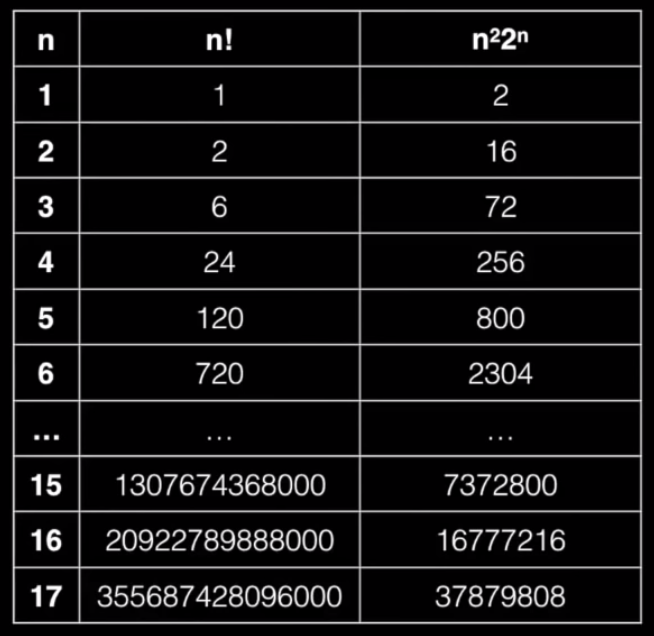
Widzimy zatem, że dla małych grafów można zastosować któryś z powyższych algorytmów (stworzyć algorytm, który jest połączeniem powyższego z poniższym).

### Implementacja
##### Z odtwarzaniem trasy (cyklu)

In [7]:
def tsp(G: 'matrix representation of a weighted graph', s: 'start vertex' = 0):
    n = len(G)
    inf = float('inf')
    F = [[inf] * (2 ** n) for _ in range(n)]
    # Calculate the initial distances from the starting vertex
    # to each other vertex and store them in the cache
    setup(G, F, s)
    # Find the optimal value for each partial tour which covers
    # all possible subsets of all the vertices
    solve(G, F, s)
    # Look for the minimum distance of a tour
    min_dist = get_min_dist(G, F, s)
    # Find the optimal tour
    tour = get_optimal_tour(G, F, s)
    
    return min_dist, tour
    
    
def setup(G, F, s):
    n = len(G)
    for i in range(n):
        if i == s: continue
        F[i][i << s | 1 << i] = G[s][i]
        
        
def solve(G, F, s):
    inf = float('inf')
    n = len(G)
    # We will look for a shortest path in each subset of
    # the G graph vertices starting from i=3 vertices and
    # ending at n vertices (when all are covered)
    for i in range(3, n + 1):
        # Loop over all n-element combinations of set of 0-1
        # values in which we have i ones and n - i zeros
        # (Each combination corresponds to the different
        # subset of the vertices set)
        for sub in combinations(i, n):
            # If the starting vertex is not in the subset
            # of graph vertices a subset is invalid
            if not incluces(sub, s): continue
            # Loop over all possible next vertices
            for j in range(n):
                # If a vertex is not a part of the current subset,
                # this vertex is invalid, so we move on
                if j == s or not incluces(sub, j): continue
                # The state will handle a case in which the next vertex
                # (j) was not in the current subset (the previous path
                # we want to refer to)
                state = sub ^ (1 << j)
                # In a loop calculate look for the shortest path we can obtain
                min_dist = inf
                for u in range(n):
                    # Check if the u vertex is the best to optimize our tour 
                    # length (we look for a node which is not included in the
                    # current subset)
                    if u == s or u == j or not incluces(sub, u): continue
                    new_dist = F[u][state] + G[u][j]
                    if new_dist < min_dist: min_dist = new_dist
                # Finally, we can store the shortest path calculated
                F[j][sub] = min_dist
                
    
def incluces(sub, val):
    return (1 << val) & sub


def combinations(k, n):
    subs = []
    
    # We will recursively generate all the combinations
    # of length n with k ones using backtracking
    def recur(curr, pos, remaining):
        if remaining == 0: subs.append(curr)
        else:
            for i in range(pos, n):
                # Generate all the subsets which will have
                # one digit at i-th position
                curr = curr | (1 << i)  # Add 1 digit at i position
                # Recursively add the remaining digits starting from
                # the next position
                recur(curr, i + 1, remaining - 1)
                # Backtrack (remove the 1 added)
                curr = curr & ~(1 << i)  # Remove 1 digit from i position
                
    recur(0, 0, k)
                
    return subs


def get_min_dist(G, F, s):
    n = len(G)
    # Use a bit mask which will correspond to the case
    # in which we cover all the vertices (set of n ones
    # in the binary representation)
    end_mask = (1 << n) - 1
    
    min_dist = float('inf')
    for u in range(n):
        if u == s: continue
        curr_dist = F[u][end_mask] + G[u][s]
        if curr_dist < min_dist:
            min_dist = curr_dist
            
    return min_dist


def get_optimal_tour(G, F, s):
    n = len(G)
    last = s
    # The end state (the same as in get_min_dist function)
    state = (1 << n) - 1
    tour = [-1] * (n + 1)
    
    for i in range(n - 1, 0, -1):
        idx = -1  # This variable will track the best next vertex
        
        for j in range(n):
            if j == s or not incluces(state, j): continue
            if idx == -1: idx = j
            prev_dist = F[idx][state] + G[idx][last]
            new_dist  = F[j][state] + G[j][last]
            if new_dist < prev_dist: idx = j
        
        # Add the next vertex found to the result
        tour[i] = idx
        # Remove the vertex from the remaining to check 
        # (from the state)
        state = state ^ (1 << idx)
        
    tour[0] = tour[n] = s
    return tour

###### Kilka testów

In [8]:
D = [
    [0, 10, 15, 20],
    [10, 0, 35, 25],
    [15, 35, 0, 30],
    [20, 25, 30, 0]
]

print(tsp(D))

(80, [0, 1, 3, 2, 0])
